<a href="https://colab.research.google.com/github/alyyokomichi/Impedance_Biosensor/blob/main/Impedance_Biosensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color=blue size=7>**Analisando dados de impedância elétrica**</font>

*by Anna Laura Yuri Yokomichi*

***

Neste projeto será analisado os dados obtidos das medidas de impedância elétrica de biossensores em resposta a presença do anticorpo anti-beta-amilóide. O estudo foi desenvolvido como projeto de mestrado da Anna Laura no Laboratório de Biossensores e Biosistemas da Universidade Federal de São Paulo - UNIFESP, São José dos Campos.


# 1 Introdução
Biossensores são dispositivos capazes de reconhecer determinada substância por meio de uma biomolécula, exemplos comuns no dia a dia são os testes de gravidez e as tiras para medir o nível de glicose.

A interação entre a molécula de interesse e a biomolécula gera uma alteração no sistema e um transdutor converte esta resposta em um sinal. Alguns transdutores mensuram sinais elétricos, que são processado por um software, descrevendo os efeitos envolvidos como parâmetros físicos.

No estudo desenvolvido foi utilizado um transdutor eletroquímico, mais especificamente a técnica de espectroscopia de impedância elétrica, onde um potencial elétrico alternado é aplicado sobre o sistema e é observado alterações na impedância como resposta.

Como um estudo preliminar foram desenvolvidos quatro sistemas:

* **Específicos**  (contém a biomolécula na mesma matriz de imobilização, porém foram utilizadas técnicas diferentes na fabricação):
 - SF/BA42
 - SFeBA42
* **Controles**:
 - SF (apenas a matriz de imobilização utilizada nos sistemas específicos)
 - SF/p24-3 (biomolécula que não reconhece a molécula de interesse sobre a mesma matriz de imobilização)
 

# 2 Objetivo

Explorar os dados de impedância elétrica coletados dos sistemas em estudo, visando determinar se os sistemas específicos possuem resposta elétrica diferente dos sistemas controles.

# 3 Metodologia
Amostras puras de anticorpo foram aplicadas sobre os sistemas, sendo usada as concentrações de 0 - 0.5 - 1 - 5 - 7.5 - 10 $\mu g/mL$. Posteriormente foi mensurado a impedância em relação ao potencial aplicado, utilizando uma faixa de frequência de 1 Hz a 1 MHz.

>>Sendo a impedância <font size=4, >$Z$ =  $Z'$ + j $Z''$ </font>

>>><font size =2>$Z'$ = impedância real <br>
>>>$Z''$ = impedância imaginária </font>

A partir dos dados coletados foram feitas análises através do Google Collab utilizando a linguagem Python.

As bibliotecas Pandas, Numpay, Matplotlib, Seaborn foram usadas para confecção de gráficos, análises e manipulação dos dados.

Para realização de previsões será utilizado o modelo de regressão linear do sklearn.

# 4 Análises

## 4.1 Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits import mplot3d
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## 4.2 Leitura dos arquivos e montagem dos DataFrames

In [2]:
# Leitura de um arquivo
X = pd.read_csv('SF_0ng.csv', sep=',')
X.head()

,Frequency (Hz),Impedance Real (Ohms),Impedance Imaginary (Ohms),Impedance Magnitude (Ohms)
0,1000000.0,88.24123,11.092040,88.93564
1,630957.3,88.49437,5.494747,88.66479
2,398107.2,88.97404,1.069733,88.98048
3,251188.6,89.68707,-2.671633,89.72685
4,158489.3,90.92319,-6.293442,91.14074


Cada arquivo contem a resposta de um sistema em relação a uma determinada concentração do anticorpo, sendo mensurada a impedância real ($Z'$), impedância imaginária ($Z"$) e a magnitude da impedância ($Z$) em relação a frequência aplicada.


Para facilitar a análise dos dados, decidiu-se montar dataframes de apenas um parâmetro ($Z'$, $Z"$, ou $Z$), agrupando os dados de todos os sistemas (SF, SF/p24-3, SF/BA42 e SFeBA42) com as diferentes concentrações do anticorpo (0 - 0.5 - 1 - 5 - 7.5 - 10 $\mu g/mL$). Para cada arquivo lido, cada coluna foi adicionada à uma lista, que posteriormente foram transformadas em dataframes.

In [3]:
concentracao = [0, 500, 1000, 5000, 7500, 10000]
sistemas = ['SF', 'SF_p24-3', 'SFeBA42', 'SF_BA42']
Z1 = []      # lista para armazenar os dados de impedância real
Z2 = []      # lista para armazenar os dados de impedância imaginaria
Z = []       # lista para armazenar os dados da magnitude da impedância
D = []       # lista para armazenar a concentracao e o sistema

# Leitura e coleta de dados dos arquivos
for s in sistemas:
  for c in concentracao:
    arq = pd.read_csv(f'{s}_{c}ng.csv', sep=',')
    arq.set_index('Frequency (Hz)', inplace=True)
    Z1.append(arq['Impedance Real (Ohms)'])               # armazenando dados lidos
    Z2.append(arq['Impedance Imaginary (Ohms)'])
    Z.append(arq['Impedance Magnitude (Ohms)'])
    D.append([c/1000, s])       # armazenando concentracao e sistema


In [4]:
# Transformando dados coletados em dataframe
Z1 = pd.DataFrame(Z1)      # dataframe com os dados de Impedância Real
Z2 = pd.DataFrame(Z2)      # dataframe com os dados de Impedância Imaginaria
Z = pd.DataFrame(Z)        # dataframe com os dados da Magnitude da Impedância
D = pd.DataFrame(D, columns=['Concentration', 'System'])  # dataframe contendo a concentração e o sistema

# Realizando ajustes nos dataframes
Z1.reset_index(inplace=True)                # alterando index para números
Z1.drop(columns = ['index'], inplace=True)  # excluindo coluna indesejada
Z1 = pd.concat([Z1, D], axis=1)             # adicionando concentracao e sistema para o dataframe
Z2.reset_index(inplace=True)
Z2.drop(columns = ['index'], inplace=True)
Z2 = pd.concat([Z2, D], axis=1)   
Z.reset_index(inplace=True)
Z.drop(columns = ['index'], inplace=True)
Z = pd.concat([Z, D], axis=1)

# Visualizando dados de um dos dataframes gerados
Z1.head()

,1000000.0,630957.3,398107.2,251188.6,158489.3,100000.0,63095.73,39810.72,25118.86,15848.93,10000.0,6309.573,3981.072,2511.886,1584.8929999999998,1000.0,630.9573,398.1071,251.1886,158.4893,100.0,63.09574,39.81072,25.11887,15.84893,10.0,6.309573,3.981072,2.511886,1.584893,1.0,Concentration,System
0,88.24123,88.49437,88.97404,89.68707,90.92319,92.49662,94.29631,96.04481,97.70567,99.52490,102.1590,106.0170,111.8174,120.9694,135.1171,156.7917,190.2595,244.6430,330.5361,474.0657,706.1536,1083.0500,1697.840,2702.748,4342.588,7031.496,11471.970,18743.67,30532.22,50125.45,91283.67,0.0,SF
1,88.14780,88.38666,88.80903,89.46890,90.62466,92.16438,94.00378,95.75499,97.42886,99.27890,101.8200,105.5129,110.9657,119.5347,133.2220,154.3553,186.7422,238.3375,319.8214,453.9505,672.3438,1023.5880,1610.473,2561.150,4113.473,6662.040,10834.860,17598.27,28976.36,47034.13,83732.85,0.5,SF
2,88.36790,88.57944,88.98732,89.61607,90.76421,92.30623,94.06610,95.78183,97.44709,99.36567,101.8020,105.3263,110.6432,118.8398,132.0660,152.5492,184.8106,235.9887,316.0666,446.3308,659.6589,1007.1450,1578.000,2508.200,4035.464,6545.804,10686.450,17529.03,28849.47,47361.07,84066.02,1.0,SF
3,88.28231,88.49156,88.88543,89.48293,90.58624,92.09593,93.78703,95.65636,97.30653,99.11120,101.5898,104.9492,110.1552,118.3271,131.1130,150.9918,181.4263,229.3339,303.1880,425.9810,621.3042,944.9435,1460.113,2304.209,3684.794,5949.973,9660.021,15818.72,26022.54,42275.84,78184.24,5.0,SF
4,88.16724,88.36272,88.74191,89.32972,90.41660,91.90254,93.63160,95.52502,97.18924,98.96346,101.4534,104.7942,109.8983,117.9529,130.4875,149.9210,179.4391,225.0768,294.6241,409.7381,592.3914,887.9810,1365.374,2145.021,3416.043,5488.260,8885.447,14502.76,23790.69,38972.90,70975.48,7.5,SF


## 4.3 Impedância em todo espectro da frequência e as concentrações do anticorpo

Uma maneira de compreendermos melhor os dados seria verificando o que ocorre com os valores de Impedância em todo espectro quando aumentamos a concentração do anticorpo nos sistemas

In [5]:
# função para plotar os gráficos de impedância

def plotando_impedancia_no_espectro(z, impedancia):

  cores =['#AED6F1', '#85C1E9', '#5DADE2', '#2E86C1', '#2874A6', '#1B4F72',
       '#FAD7A0', '#F8C471', '#F39C12', '#D68910', '#B9770E', '#7E5109',
       '#D4EFDF', '#A9DFBF', '#7DCEA0', '#27AE60', '#229954', '#1E8449',
       '#F5B7B1', '#F1948A', '#EC7063', '#E74C3C', '#B03A2E', '#78281F']
  sistema = ['SF', 'SF/p24-3', 'SFeBA42', 'SF/BA42']
  contador = 0

  fig = plt.figure(figsize = (19, 15), constrained_layout=True)
  spec = gridspec.GridSpec(ncols=2, nrows=4, figure=fig)
  
  for i in range(4):
    f_ax = fig.add_subplot(spec[i, 0])
    f_ax.set_title(f'Resposta do sistema {sistema[i]} a diferentes concentrações do anticorpo', fontsize= 16)
    f_ax.set_ylabel(f"{impedancia} (Ohms)", fontsize=16)
    for j in range(6):
      f_ax.plot(z.iloc[j+contador, :-2], color=cores[j+contador])
    f_ax.legend(['0', '0.5', '1', '5', '7.5', '10'])
    f_ax.tick_params(labelsize=12)
    plt.xscale('log')
    if(z.loc[contador, 1] > z.loc[contador+5, 1]):
      f_ax.annotate('Diminuição da impedância', xy=(3, z.loc[contador+5, 1]), xytext= (3, z.loc[contador, 1]), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=10)
    else:
      f_ax.annotate('Aumento da impedância', xy=(3, z.loc[contador+5, 1]), xytext= (3, z.loc[contador, 1]), arrowprops=dict(facecolor='black', shrink=0.01), fontsize=10)
    contador+=6
  plt.show()

### 4.3.1 Impedância real ($Z'$)

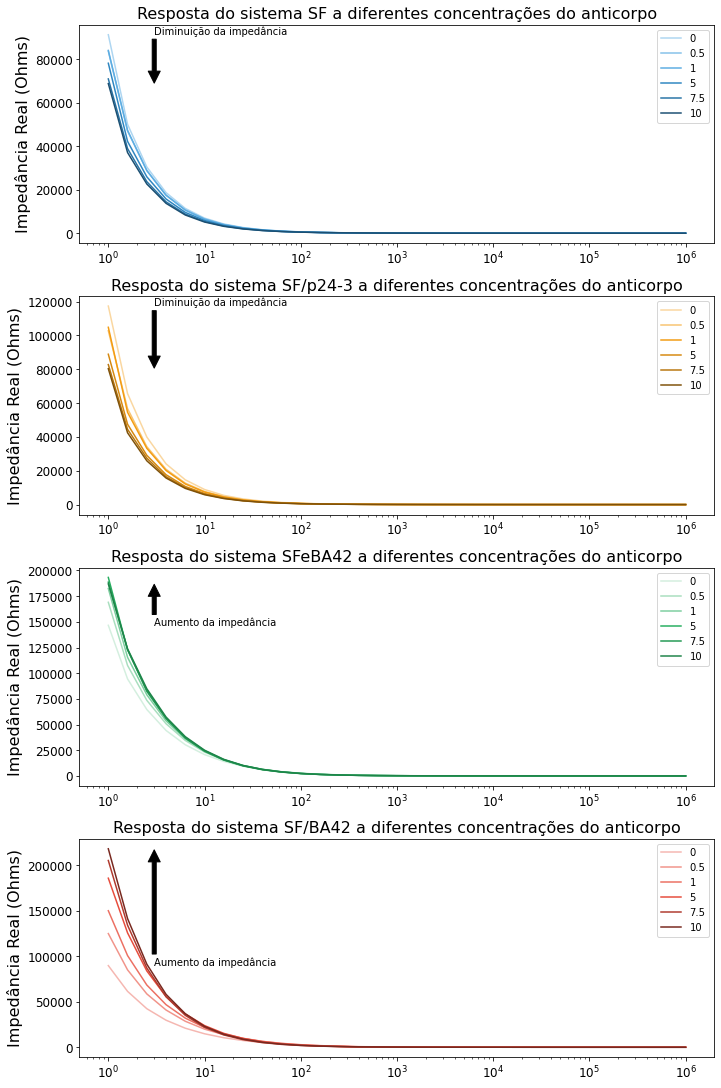

In [6]:
plotando_impedancia_no_espectro(Z1, 'Impedância Real')

Quando analisamos a Impedância Real ($Z'$) de cada sistema observamos:

* Há uma maior variação nos valores de impedância entre as concentrações do anticorpo para frequências mais baixas (< 10 Hz).

* Em resposta a presença do anticorpo os sistemas específicos tiveram uma magnitude maior da Impedância Real em frequências baixas.

* Houve um aumento dos valores de Impedância Real em baixas frequências com o aumento da concentração do anticorpo para os sistemas que contêm a biomolécula de reconhecimento, enquanto que os sistemas controles obtiveram comportamento oposto.




### 4.3.2 Impedância Imaginária ($Z"$)

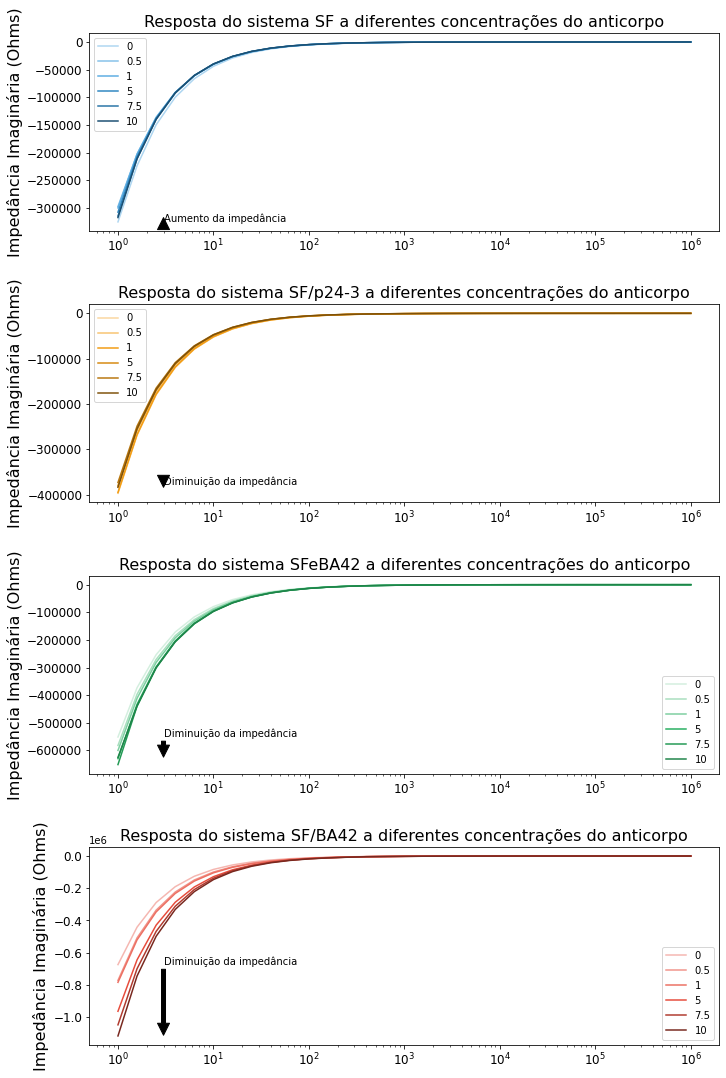

In [7]:
plotando_impedancia_no_espectro(Z2, 'Impedância Imaginária')

Quando analisamos a Impedância Imaginária ($Z"$) de cada sistema observamos:

* Há uma maior variação nos valores de impedância entre as concentrações do anticorpo para frequências mais baixas (< 10 Hz).

* Em resposta a presença do anticorpo os sistemas específicos tiveram uma magnitude menor na Impedância Imaginária em frequências baixas.

* Houve diminuição da magnitude da Impedância Imaginária em baixas frequências com o aumento da concentração do anticorpo para os sistemas contendo a biomolécula de reconhecimento, enquanto que os sistemas controles não tiveram variação significativa.


### 4.3.3 Magnitude da Impedância ($Z$)

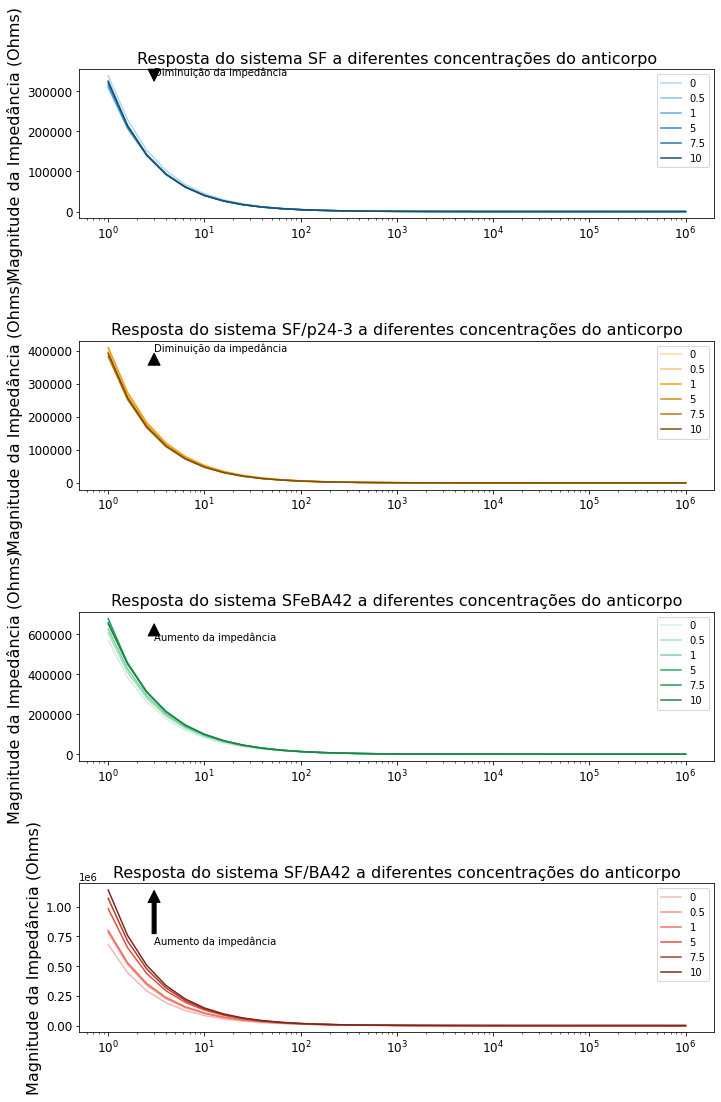

In [8]:
plotando_impedancia_no_espectro(Z, 'Magnitude da Impedância')

Quando analisamos a Magnitude da Impedância ($Z$) de cada sistema observamos:

* Há uma maior variação nos valores de impedância entre as concentrações do anticorpo para frequências mais baixas (< 10 Hz).

* Em resposta a presença do anticorpo os sistemas específicos tiveram os menores valores da Magnitude da Impedância em frequências baixas.

* Houve aumento nos valores da Magnitude de Impedância em baixas frequências com o aumento da concentração do anticorpo para os sistemas contendo a biomolécula de reconhecimento, enquanto que os sistemas controles não tiveram variação significativa.

## 4.4 Valores de impedância em 1 Hz

Em frequências a baixo de 10 Hz foi possível observar com maior facilidade as diferenças nos valores da impedância entre as concentrações do anticorpo.

Para um melhor entendimento dos dados vamos explorar o quão significativo são essas variações, sendo escolhido a frequência de 1 Hz.

### 4.4.1 Impedância Real ($Z'$)

In [9]:
# Informações estatísticas básicas da Impedância Real dos sistemas
Z1.groupby('System')[1].describe()

,count,mean,std,min,25%,50%,75%,max
System,,,,,,,,
SF,6.0,79511.523333,8554.926018,68826.88000,72777.67000,80958.545000,83982.727500,91283.67000
SF_BA42,6.0,162225.435169,49604.842753,89703.19666,131155.04737,167835.470891,200256.681956,217986.48073
SF_p24-3,6.0,96186.485000,14495.849778,80366.49000,84326.55500,95862.610000,104335.425000,117386.30000
SFeBA42,6.0,177789.616667,17356.418481,146625.90000,172377.92500,184647.850000,188142.550000,193220.70000


In [10]:
#incluir coluna numerando os sistemas para conseguir fazer boxplot
Z1['NumSystem'] = Z1['System'].map({'SF':0, 'SF_p24-3':1, 'SFeBA42':2, 'SF_BA42':3})

In [11]:
# Lista para renomear eixo X do boxplot
sist= ['SF', 'SF/p24-3', 'SFeBA42', 'SF/BA42']

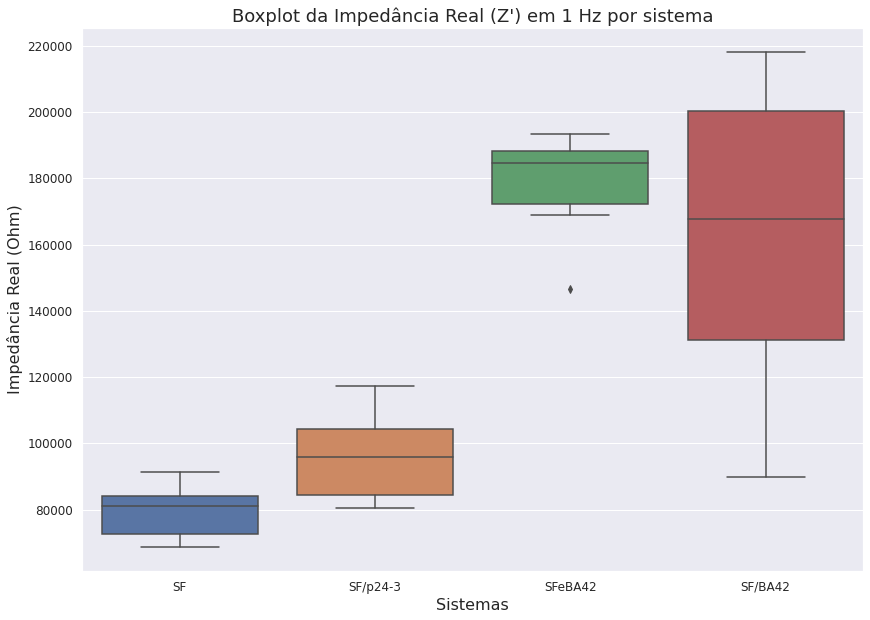

In [12]:
# Impedância Real _ Boxplot

sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='NumSystem', y=Z1[1], data= Z1, orient='v')
ax.set_title("Boxplot da Impedância Real (Z') em 1 Hz por sistema", fontsize=18)
ax.set_xlabel('Sistemas', fontsize=16)
ax.set_ylabel('Impedância Real (Ohm)', fontsize=16)
ax.set_xticklabels(sist, fontsize=16)
ax.tick_params(labelsize=12)

### 4.4.2 Impedância Imaginária ($Z"$)

In [13]:
# Informações estatísticas básicas da Impedância Imaginaria dos sistemas
Z2.groupby('System')[1].describe()

,count,mean,std,min,25%,50%,75%,max
System,,,,,,,,
SF,6.0,-310137.516667,10745.266995,-3.250248e+05,-3.165043e+05,-310921.250000,-301649.800000,-297033.100000
SF_BA42,6.0,-893633.055900,175401.863451,-1.117548e+06,-1.027534e+06,-874487.969216,-775324.614067,-674453.921686
SF_p24-3,6.0,-384921.283333,9285.017317,-3.969651e+05,-3.922418e+05,-382469.000000,-379806.425000,-373206.300000
SFeBA42,6.0,-606808.833333,36214.094430,-6.515235e+05,-6.287189e+05,-612761.200000,-586780.300000,-551648.900000


In [14]:
#incluir coluna numerando os sistemas para conseguir fazer boxplot
Z2['NumSystem'] = Z2['System'].map({'SF':0, 'SF_p24-3':1, 'SFeBA42':2, 'SF_BA42':3})

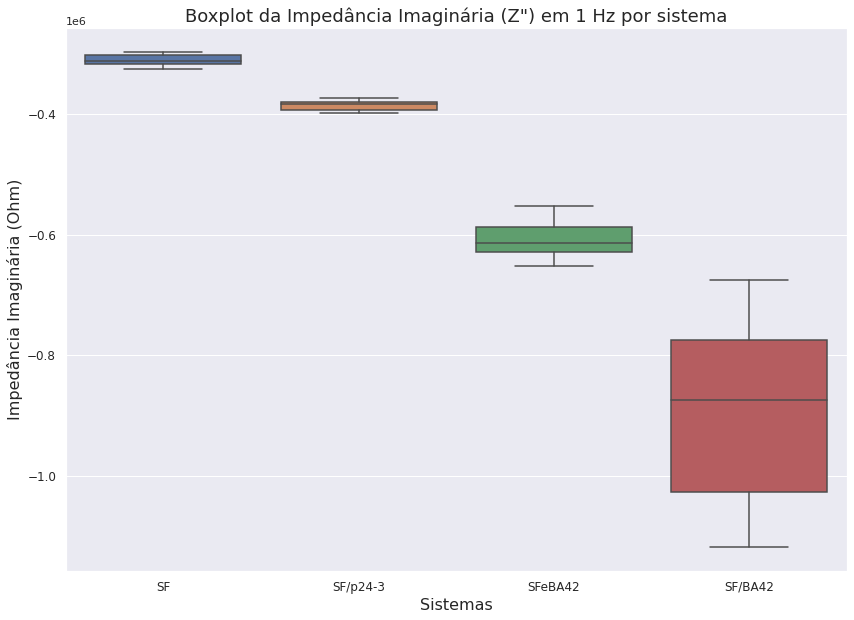

In [15]:
# Impedância Imaginária _ Boxplot

sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='NumSystem', y=Z2[1], data= Z2, orient='v')
ax.set_title('Boxplot da Impedância Imaginária (Z") em 1 Hz por sistema', fontsize=18)
ax.set_xlabel('Sistemas', fontsize=16)
ax.set_ylabel('Impedância Imaginária (Ohm)', fontsize=16)
ax.set_xticklabels(sist, fontsize=16)
ax.tick_params(labelsize=12)

### 4.4.3 Magnitude da Impedância ($Z$)

In [16]:
# Informações estatísticas básicas da Magnitude da Impedância dos sistemas

Z.groupby('System')[1].describe()

,count,mean,std,min,25%,50%,75%,max
System,,,,,,,,
SF,6.0,320270.300000,10479.339266,308609.600000,312771.025000,319769.950000,3.240181e+05,3.376001e+05
SF_BA42,6.0,908437.434504,181087.613416,680393.089301,786400.383633,890448.365392,1.046867e+06,1.138610e+06
SF_p24-3,6.0,396946.550000,10769.013260,382280.200000,391519.925000,394670.650000,4.058123e+05,4.100619e+05
SFeBA42,6.0,632364.816667,39264.674826,570802.600000,611585.175000,639979.150000,6.572769e+05,6.782646e+05


In [17]:
#incluir coluna numerando os sistemas para conseguir fazer boxplot
Z['NumSystem'] = Z['System'].map({'SF':0, 'SF_p24-3':1, 'SFeBA42':2, 'SF_BA42':3})

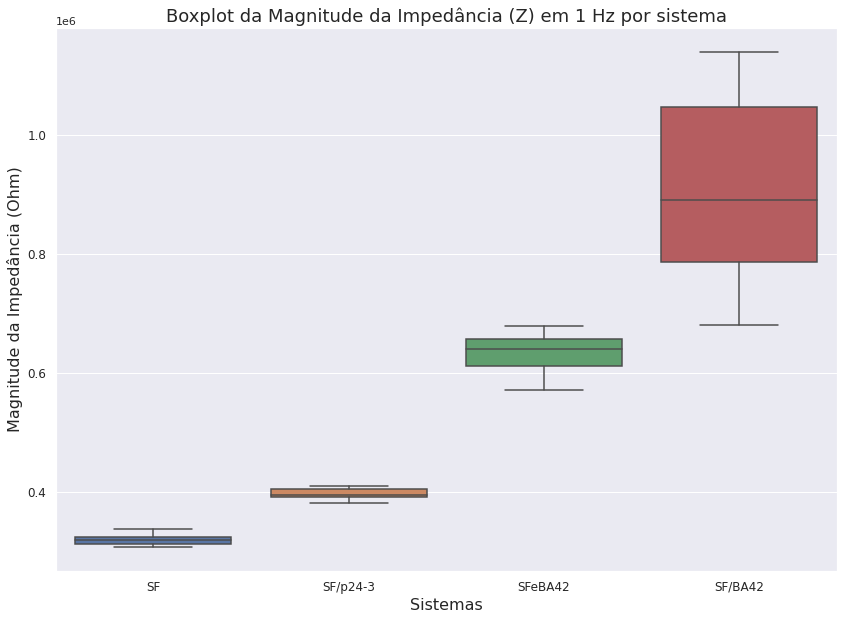

In [18]:
# Magnitude da Impedância _ Boxplot

sns.set(rc={'figure.figsize':(14,10)})
ax = sns.boxplot(x='NumSystem', y=Z[1], data= Z, orient='v')
ax.set_title('Boxplot da Magnitude da Impedância (Z) em 1 Hz por sistema', fontsize=18)
ax.set_xlabel('Sistemas', fontsize=16)
ax.set_ylabel('Magnitude da Impedância (Ohm)', fontsize=16)
ax.set_xticklabels(sist, fontsize=16)
ax.tick_params(labelsize=12)

A partir dos Boxplots foi possível observar melhor as diferenças entre os valores de impedância dos sistemas na frequência de 1 Hz

 - Sistemas controles tiveram magnitudes menores das impedâncias com pequena variação entre as concentrações do anticorpo, principalmente para $Z"$ e $Z$.

 - Os sistemas contendo a biomolécula de reconhecimento obtiveram valores maiores das impedâncias. Para o biossensor SF/BA42 as variações entre as concentrações do anticorpo foi mais significativa.

## 4.5 Gráfico de dispersão dos sistemas na frequência de 1 Hz

Na análise anterior observamos separadamente os valores de impedância de cada sistema em 1 Hz, sendo possível notar as diferenças existentes. Mas é preciso analisar se comportamento distinto entre os sistemas na presença do anticorpo permanece quando relacionamos os valores de impedância.



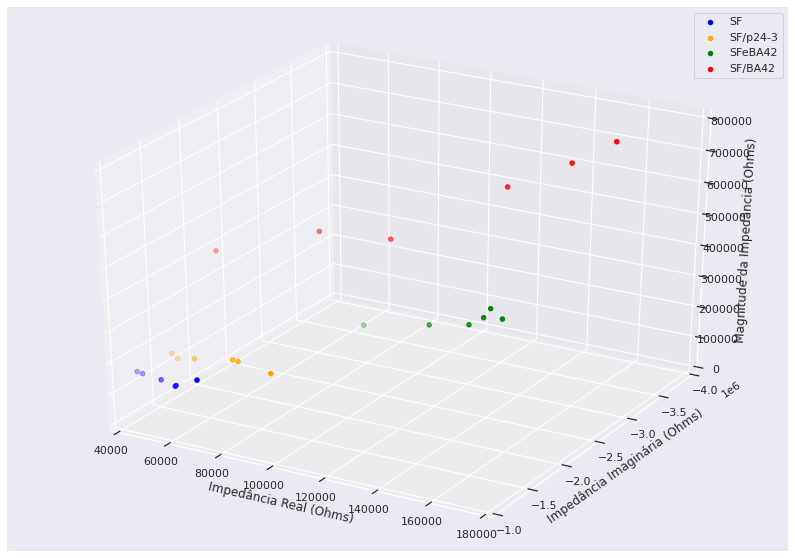

In [19]:
# Gráfico de dispersao, utilizando Z', Z" e Z
ax = plt.axes(projection = '3d')
ax.scatter(Z1.query('NumSystem == 0')[1], Z2.query('NumSystem == 0')[1], Z.query('NumSystem == 0')[1], color='blue', label='SF')
ax.scatter(Z1.query('NumSystem == 1')[1], Z2.query('NumSystem == 1')[1], Z.query('NumSystem == 1')[1], color='orange', label='SF/p24-3')
ax.scatter(Z1.query('NumSystem == 2')[1], Z2.query('NumSystem == 2')[1], Z.query('NumSystem == 2')[1], color='green', label='SFeBA42')
ax.scatter(Z1.query('NumSystem == 3')[1], Z2.query('NumSystem == 3')[1], Z.query('NumSystem == 3')[1], color='red', label='SF/BA42')
ax.set_xlim(40000, 180000)
ax.set_ylim(-1000000, -4000000)
ax.set_zlim(0, 810000)
ax.set_xlabel("Impedância Real (Ohms)")
ax.set_ylabel("Impedância Imaginária (Ohms)")
ax.set_zlabel("Magnitude da Impedância (Ohms)")
ax.legend()

Com o gráfico de dispersão podemos visualizar melhor a relação entre as variáveis de impedância e entre as mesmas concentrações do anticorpo, o que não era viável nas análises anteriores.

Os pontos de coloração mais fraca indicam concentração 0 do anticorpo, ou seja, é a impedância dos materias que compõe cada sistema e se encontram em regiões diferentes do gráfico.

Quando o anticorpo é adicionado, a variação na impedância se mostra significativa para o biossensor SF/BA42, sugerindo ter uma maior sensibilidade com as diferentes concentrações. 

## 4.6 Realizando previsões

O modelo de regressão linear será utilizada para prever a qual sistema um dado pertence a partir dos valores de Impedância Real, Impedância Imaginária e Magnitude de Impedância em 1 Hz.

In [20]:
y = Z1['NumSystem']    #coluna de variaveis dependentes
X = pd.DataFrame([Z1[1], Z2[1], Z[1]])  #coluna das variaveis explicativas
X = X.T
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811) # Separando variaveis de treino e de teste

In [21]:
# Criando modelo de regressao linear e calculando seu coeficiente de determinacao 
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print(f'Coeficiente de determinação do modelo = {modelo.score(X_train, y_train).round(2)}')

Coeficiente de determinação do modelo = 0.88


In [22]:
# Realizando previsao do modelo a partir de variaveis de teste e calculando seu coeficiente de determinacao 
y_previsto = modelo.predict(X_test)
print(f'Coeficiente de determinação entre a previsão e o teste = {metrics.r2_score(y_test, y_previsto).round(2)}')

Coeficiente de determinação entre a previsão e o teste = 0.86


A partir do modelo utilizado, foi obtido um coeficiente de determinação próximo de 1, indicando que há um bom ajuste dos dados. O mesmo se aplica ao coeficiente de determinação entre as previsões realizadas e os testes. Estes resultados indicam que é possível diferenciar os sistemas a partir da associação dos valores de impedância em 1 Hz.

## 5 Conclusão

* Quando analisamos os valores de impedância em todo o espectro para cada sistema, há variações mais notáveis entre as concentrações do anticorpo para frequências inferiores a 10 Hz.

* Comparando o comportamento de cada sistema em 1 Hz, notamos que os sistemas específicos obtiveram magnitude maior dos valores de impedância.

* Quando relacionamos os valores de impedância em 1 Hz observamos o comportamento distinto dos sistemas estudados, havendo maior variação entre as concentrações do anticorpo para o biossensor SF/BA42.

* Utilizando um modelo de regressão linear para prever a qual grupo um dado aleatório pertence, obtivemos bons resultados. Indicando que os sistemas possuem diferenças entre si.

Com as análises realizadas observamos que sistemas contendo a biomolécula de reconhecimento possuem resposta elétrica diferente dos sistemas controles na presença do anticorpo, sugerindo que a alteração observada pode estar relacionada a interação entre o anticorpo e a biomolécula.